# COMPUTER LAB 3

Work through the "Third Computer Lab" (Chapter 9) in _A Student's Guide to Python._  This exercise illustrates how to work with images in Python.

You can use this notebook to store your code, plots, and notes, or you can write a ___script___ (see Section 3.3) that will carry out the analysis and produce the plots, and simply write your comments and observations in this notebook.  If you write a script, it should save your plots and images to PDF, JPG, or PNG files in this folder when it runs.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sc
from scipy.signal import convolve
from mpl_toolkits.mplot3d import Axes3D

## 9.1.1 Python tools for image processing
Testing python tools for image processing to understand how convolution and images works

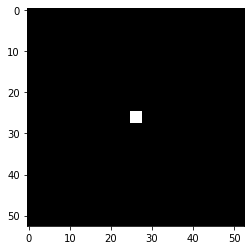

In [8]:
impulse = np.zeros((51,51))
impulse[25,25] = 1.0
my_filter = np.ones((3,3))/9
response = convolve(impulse,my_filter)
plt.figure()
plt.imshow(response)

## 9.1.2 Averaging

In [9]:
#importing the gauss filter and cat image
gauss_filter = np.loadtxt('gauss_filter.csv',delimiter =',')
image = plt.imread('bwCat.tif')

(-0.5, 865.5, 649.5, -0.5)

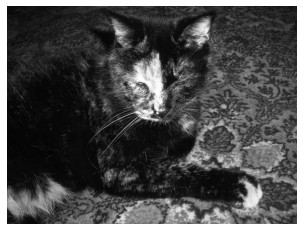

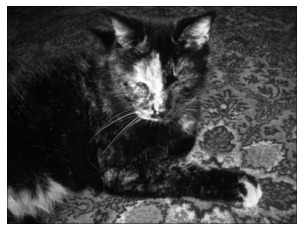

In [10]:
# Creating a 3x3 filter
my_filter = np.ones((3,3))/9

response1 = convolve(image,my_filter)
plt.figure()
plt.imshow(image)
plt.set_cmap('gray')
plt.axis('off')
#fig = plt.gcf()
#fig.set_facecolor('white')

plt.figure()
plt.imshow(response1)
plt.set_cmap('gray')
plt.axis('off')

(-0.5, 877.5, 661.5, -0.5)

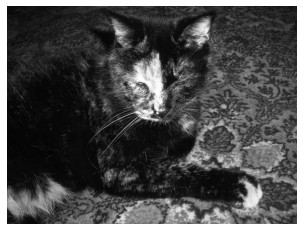

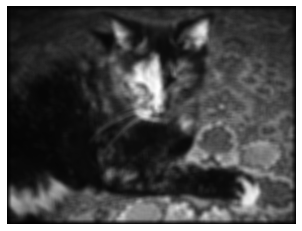

In [14]:
large_square = np.ones((15,15))/9
response2 = convolve(image,large_square)
plt.figure()
plt.imshow(image)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(response2)
plt.set_cmap('gray')
plt.axis('off')

(-0.5, 907.5, 691.5, -0.5)

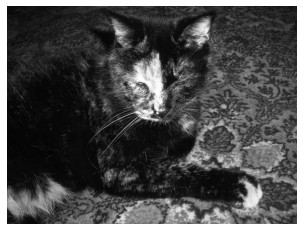

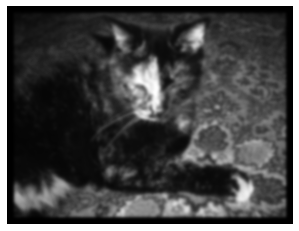

In [17]:
response3 = convolve(image,gauss_filter)
plt.figure()
plt.imshow(image)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(response3)
plt.set_cmap('gray')
plt.axis('off')

(-0.5, 52.5, 52.5, -0.5)

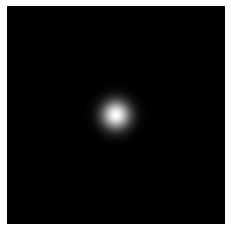

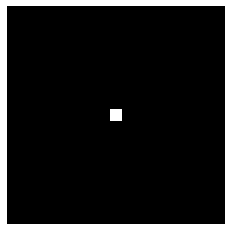

In [20]:
plt.figure()
plt.imshow(convolve(impulse,gauss_filter))
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(convolve(impulse,my_filter))
plt.set_cmap('gray')
plt.axis('off')

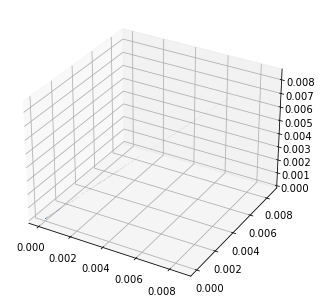

In [58]:
gauss = convolve(impulse,gauss_filter)
ax = Axes3D(plt.figure())
ax.plot_surface(gauss,gauss,gauss,rstride=1,cstride=1)

In [51]:
from numpy.random import default_rng
rng = default_rng()
rand = rng.random

(-0.5, 863.5, 647.5, -0.5)

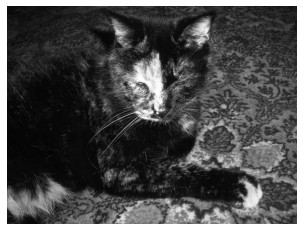

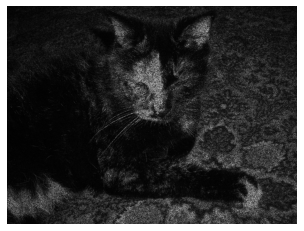

In [74]:
noise = rand((648,864))
noise_img = noise*image

plt.figure()
plt.imshow(image)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(noise_img)
plt.set_cmap('gray')
plt.axis('off')

(-0.5, 907.5, 691.5, -0.5)

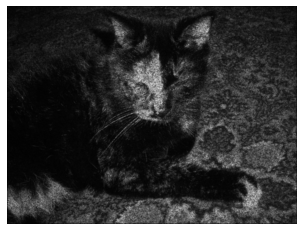

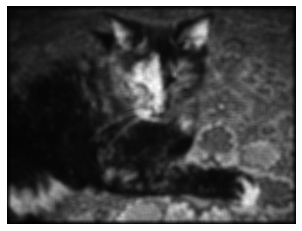

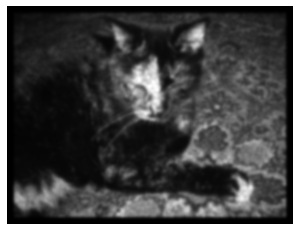

In [75]:
noise_small_sq = convolve(noise_img,my_filter)
noise_large_sq = convolve(noise_img,large_square)
noise_gauss = convolve(noise_img,gauss_filter)

plt.figure()
plt.imshow(noise_small_sq)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(noise_large_sq)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(noise_gauss)
plt.set_cmap('gray')
plt.axis('off')

(-0.5, 375.5, 443.5, -0.5)

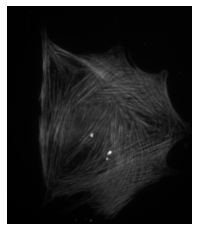

In [6]:
stress = np.loadtxt('stressFibers.csv',delimiter =',')
plt.figure()
plt.imshow(stress)
plt.set_cmap('gray')
plt.axis('off')

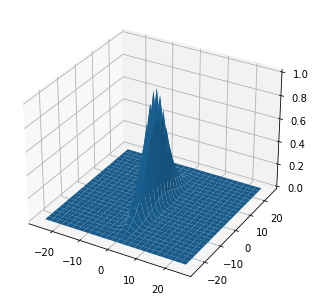

In [10]:
v = np.arange(-25,26)
X,Y = np.meshgrid(v,v)
gauss_filter = np.exp(-0.5*(X**2/2 + Y**2/45))

ax = Axes3D(plt.figure())
ax.plot_surface(X,Y,gauss_filter)

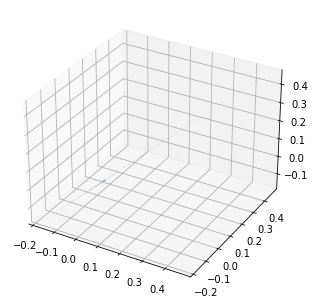

In [14]:
laplace_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
combined_filter = convolve(gauss_filter,laplace_filter,mode='valid')
ax = Axes3D(plt.figure())
ax.plot_surface(combined_filter,combined_filter,combined_filter)

(-0.5, 423.5, 491.5, -0.5)

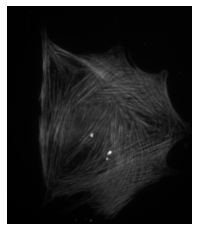

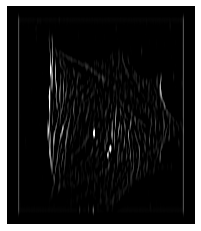

In [19]:
stress_combined = convolve(stress,combined_filter)
plt.figure()
plt.imshow(stress)
plt.set_cmap('gray')
plt.axis('off')

plt.figure()
plt.imshow(stress_combined,vmin=0,vmax=.5*stress_combined.max())
plt.set_cmap('gray')
plt.axis('off')